In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras
from sklearn.decomposition import PCA
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Nadam

In [2]:
batch_size = 128
num_classes = 2
epochs = 10

In [3]:
x_train = np.load('npy_brestCancer/x_train.npy')
y_train = np.load('./npy_brestCancer/y_train.npy')
x_test=np.load('./npy_brestCancer/x_test.npy')
y_test=np.load('./npy_brestCancer/y_test.npy')

In [4]:
x_train.shape

(879, 64, 64)

In [5]:
x_test.shape

(433, 64, 64)

In [6]:
y_test.shape

(433, 2)

In [7]:
# Change from matrix to array --> dimension 64x64 to array of dimention 4096
x_train = x_train.reshape(879, 4096)
x_test = x_test.reshape(433, 4096)

In [8]:
y_test.shape

(433, 2)

In [9]:
# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

879 train samples
433 test samples


In [10]:
# PCA
pca = PCA(n_components=100)

x_train=pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [11]:
#                      BUILDING THE MODEL
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
nadam=keras.optimizers.Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 315,394
Trainable params: 315,394
Non-trainable params: 0
_________________________________________________________________


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
#                      TRAINING THE MODEL
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/100
7/7 [==============================] - 1s 47ms/step - loss: 0.6800 - accuracy: 0.6712 - val_loss: 0.6641 - val_accuracy: 0.6790
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6512 - accuracy: 0.6792 - val_loss: 0.6333 - val_accuracy: 0.6790
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6239 - accuracy: 0.6792 - val_loss: 0.6237 - val_accuracy: 0.6790
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.6203 - accuracy: 0.6792 - val_loss: 0.6223 - val_accuracy: 0.6790
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6161 - accuracy: 0.6792 - val_loss: 0.6166 - val_accuracy: 0.6790
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.6111 - accuracy: 0.6792 - val_loss: 0.6135 - val_accuracy: 0.6790
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.6065 - accuracy: 0.6792 - val_loss: 0.6096 - val_accuracy: 0.6790
Epoch 8/100
7/7 [===

7/7 [==============================] - 0s 18ms/step - loss: 0.3113 - accuracy: 0.8862 - val_loss: 0.4959 - val_accuracy: 0.8106
Epoch 60/100
7/7 [==============================] - 0s 17ms/step - loss: 0.3060 - accuracy: 0.8805 - val_loss: 0.4904 - val_accuracy: 0.7783
Epoch 61/100
7/7 [==============================] - 0s 17ms/step - loss: 0.2997 - accuracy: 0.8794 - val_loss: 0.4860 - val_accuracy: 0.8060
Epoch 62/100
7/7 [==============================] - 0s 18ms/step - loss: 0.2896 - accuracy: 0.8874 - val_loss: 0.4908 - val_accuracy: 0.8106
Epoch 63/100
7/7 [==============================] - 0s 16ms/step - loss: 0.2939 - accuracy: 0.8805 - val_loss: 0.4864 - val_accuracy: 0.7921
Epoch 64/100
7/7 [==============================] - 0s 16ms/step - loss: 0.2775 - accuracy: 0.8908 - val_loss: 0.4850 - val_accuracy: 0.8152
Epoch 65/100
7/7 [==============================] - 0s 17ms/step - loss: 0.2705 - accuracy: 0.8976 - val_loss: 0.4839 - val_accuracy: 0.7806
Epoch 66/100
7/7 [========

In [13]:
#                      EVALUATE TRAINED MODEL
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.53770911693573
Test accuracy: 0.8060046434402466


In [14]:
model.save('mlp_weights_1.h5')

In [15]:
model.load_weights('mlp_weights_1.h5')

In [16]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_2').output)

feat_train = model_feat.predict(x_train)
print(feat_train.shape)

#feat_val = model_feat.predict(x_val)
#print(feat_val.shape)

feat_test = model_feat.predict(x_test)
print(feat_test.shape)

28/28 [==============================] - 0s 2ms/step
(879, 2)
14/14 [==============================] - 0s 3ms/step
(433, 2)


In [17]:
from keras import metrics
from sklearn.metrics import confusion_matrix

In [18]:
pred = model.predict(x_test)

14/14 [==============================] - 0s 2ms/step


In [19]:
y_test=y_test.astype('int64')

In [20]:
y_test

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1,

In [21]:
pred =pred.astype('int64')

In [22]:
pred

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0,

In [23]:
confusion_matrix(pred, np.argmax(y_test,axis =1))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [24]:
import seaborn as sns

In [25]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['Drousy', 'Not Drowsy'])
    df_cm2.columns=['Drousy', 'Not Drowsy']
    f,ax = plt.subplots(figsize=(12, 12))
    #ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

In [26]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [27]:
from sklearn.metrics import classification_report
print(classification_report(pred, np.argmax(y_test,axis =1),digits=4))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [28]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')

svm.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

fitting done !!!


In [29]:
svm.score(feat_train,np.argmax(y_train,axis=1))

0.9601820250284414

In [30]:
svm.score(feat_test,np.argmax(y_test,axis=1))

0.7944572748267898

In [31]:
Pred_labels = svm.predict(feat_test)

In [32]:
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

              precision    recall  f1-score   support

           0  0.8809524 0.8274760 0.8533773       313
           1  0.6115108 0.7083333 0.6563707       120

    accuracy                      0.7944573       433
   macro avg  0.7462316 0.7679047 0.7548740       433
weighted avg  0.8062803 0.7944573 0.7987796       433



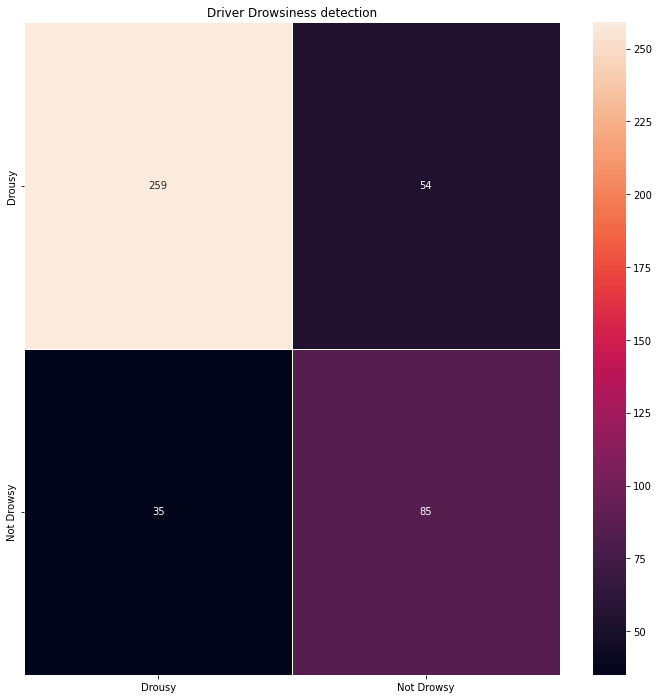

In [33]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

# Applying XGBOOST

In [34]:
import xgboost as xgb

xb = xgb.XGBClassifier()

xb.fit(feat_train,np.argmax(y_train,axis=1))

print('fitting done !!!')

fitting done !!!


In [35]:
xb.score(feat_train,np.argmax(y_train,axis=1))

0.9920364050056882

In [36]:
xb.score(feat_test,np.argmax(y_test,axis=1))

0.7713625866050808

In [37]:
Pred_labels = xb.predict(feat_test)

In [38]:
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

              precision    recall  f1-score   support

           0  0.8469388 0.8217822 0.8341709       303
           1  0.6115108 0.6538462 0.6319703       130

    accuracy                      0.7713626       433
   macro avg  0.7292248 0.7378142 0.7330706       433
weighted avg  0.7762560 0.7713626 0.7734640       433



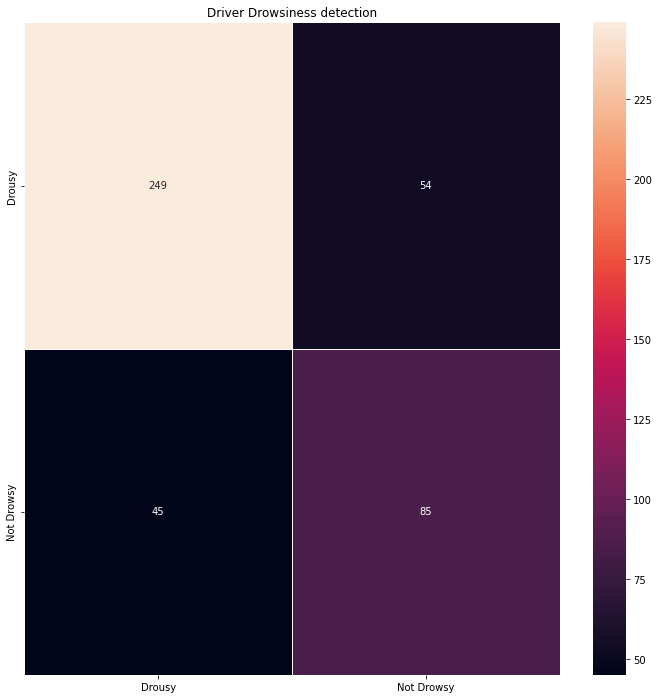

In [39]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [41]:
lr = LogisticRegression()
lr.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')

fitting done !!!


In [42]:
Pred_labels = lr.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

              precision    recall  f1-score   support

           0  0.8775510 0.8295820 0.8528926       311
           1  0.6187050 0.7049180 0.6590038       122

    accuracy                      0.7944573       433
   macro avg  0.7481280 0.7672500 0.7559482       433
weighted avg  0.8046198 0.7944573 0.7982634       433



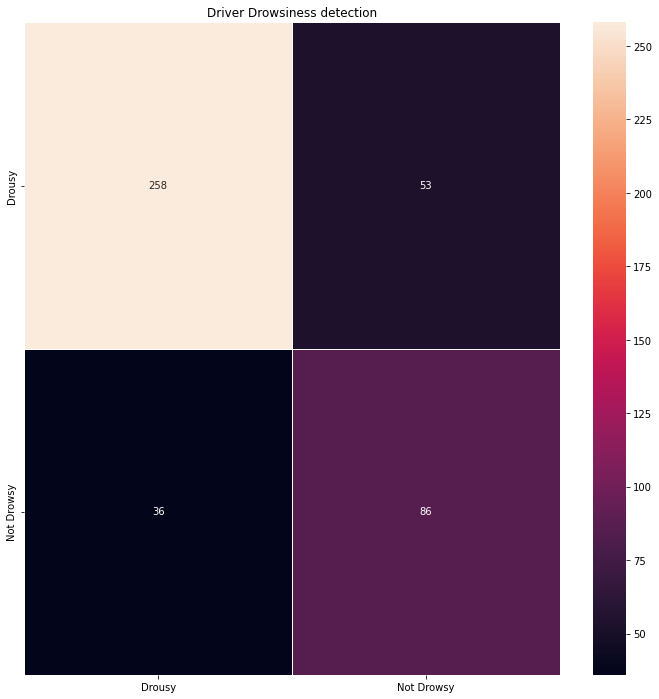

In [43]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

In [44]:
dt = DecisionTreeClassifier()
dt.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = dt.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

fitting done !!!
              precision    recall  f1-score   support

           0  0.8469388 0.8355705 0.8412162       298
           1  0.6474820 0.6666667 0.6569343       135

    accuracy                      0.7829099       433
   macro avg  0.7472104 0.7511186 0.7490753       433
weighted avg  0.7847525 0.7829099 0.7837611       433



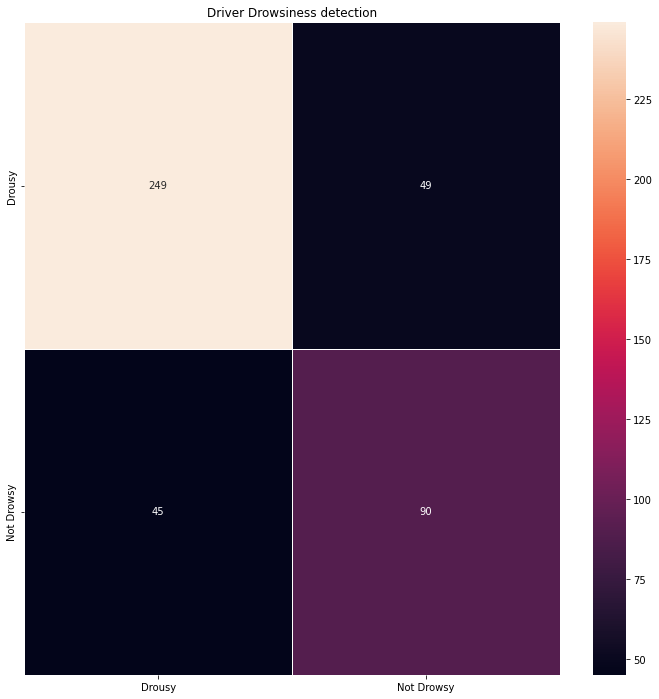

In [45]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

In [46]:
knn = KNeighborsClassifier()
knn.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = knn.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

fitting done !!!
              precision    recall  f1-score   support

           0  0.8605442 0.8377483 0.8489933       302
           1  0.6474820 0.6870229 0.6666667       131

    accuracy                      0.7921478       433
   macro avg  0.7540131 0.7623856 0.7578300       433
weighted avg  0.7960843 0.7921478 0.7938321       433



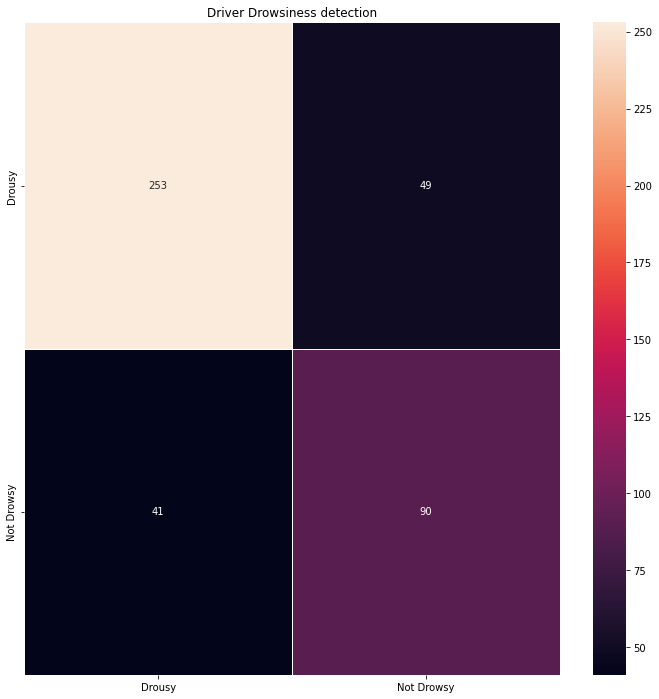

In [47]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

In [48]:
lda = LinearDiscriminantAnalysis()
lda.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = lda.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

fitting done !!!
              precision    recall  f1-score   support

           0  0.8911565 0.8264984 0.8576105       317
           1  0.6043165 0.7241379 0.6588235       116

    accuracy                      0.7990762       433
   macro avg  0.7477365 0.7753182 0.7582170       433
weighted avg  0.8143125 0.7990762 0.8043558       433



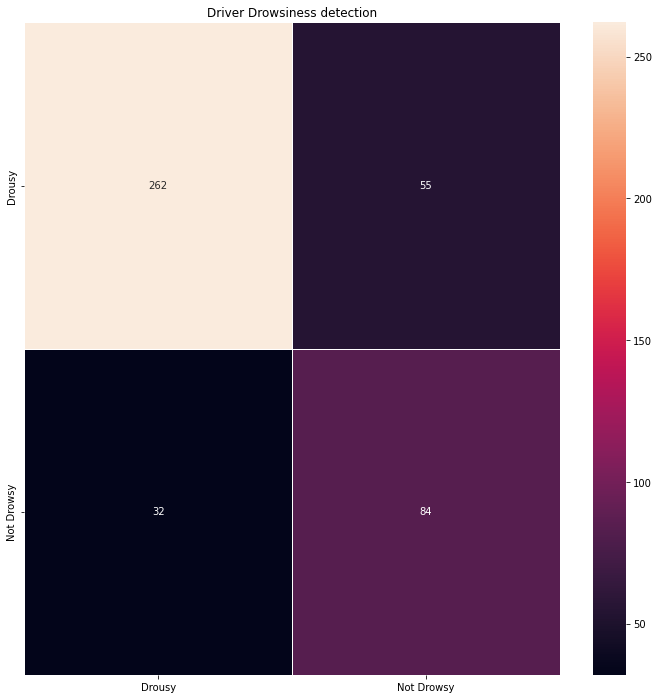

In [49]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

In [50]:
nb = GaussianNB()
nb.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = nb.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

fitting done !!!
              precision    recall  f1-score   support

           0  0.8231293 0.8402778 0.8316151       288
           1  0.6690647 0.6413793 0.6549296       145

    accuracy                      0.7736721       433
   macro avg  0.7460970 0.7408285 0.7432723       433
weighted avg  0.7715372 0.7736721 0.7724479       433



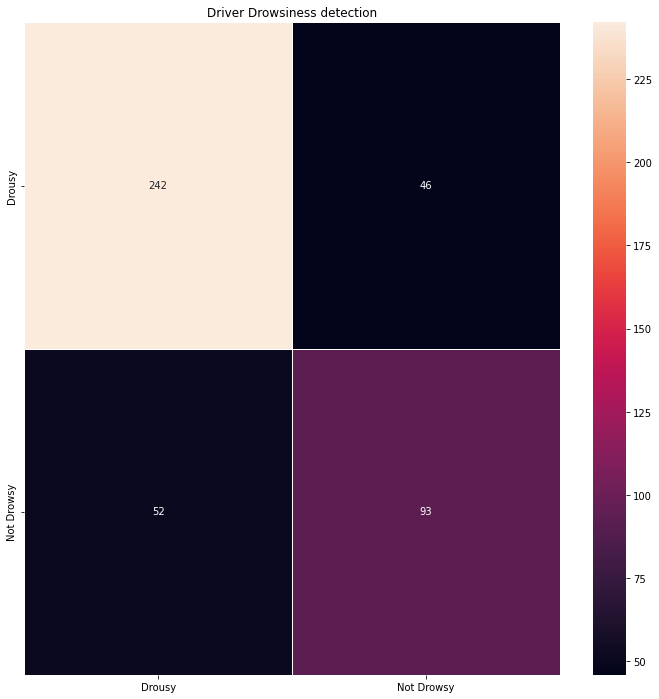

In [51]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

In [52]:
et = ExtraTreesClassifier()
et.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = et.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

fitting done !!!
              precision    recall  f1-score   support

           0  0.8435374 0.8350168 0.8392555       297
           1  0.6474820 0.6617647 0.6545455       136

    accuracy                      0.7806005       433
   macro avg  0.7455097 0.7483908 0.7469005       433
weighted avg  0.7819588 0.7806005 0.7812403       433



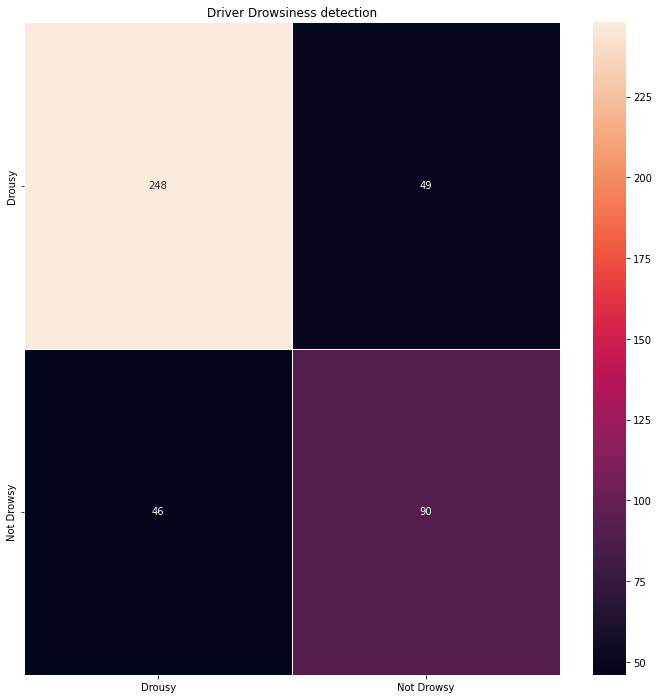

In [53]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

In [54]:
estimators = list()
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('LR', LogisticRegression()))
estimators.append(('DTC', DecisionTreeClassifier()))
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
estimators.append(('NB', GaussianNB()))
#estimators.append(('SVM', GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)))
estimators.append(('XGB', XGBClassifier()))

In [55]:
ensemble = VotingClassifier(estimators=estimators, voting='soft')
ensemble.fit(feat_train,np.argmax(y_train,axis=1))
print('fitting done !!!')
Pred_labels = ensemble.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=7))

fitting done !!!
              precision    recall  f1-score   support

           0  0.8639456 0.8327869 0.8480801       305
           1  0.6330935 0.6875000 0.6591760       128

    accuracy                      0.7898383       433
   macro avg  0.7485196 0.7601434 0.7536281       433
weighted avg  0.7957029 0.7898383 0.7922378       433



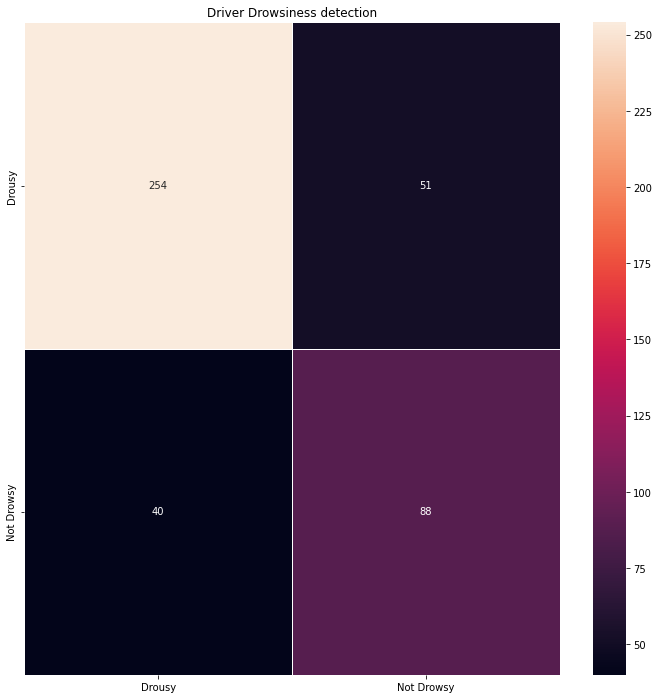

In [56]:
plot_heatmap(confusion_matrix(Pred_labels, np.argmax(y_test,axis =1)),'Driver Drowsiness detection')

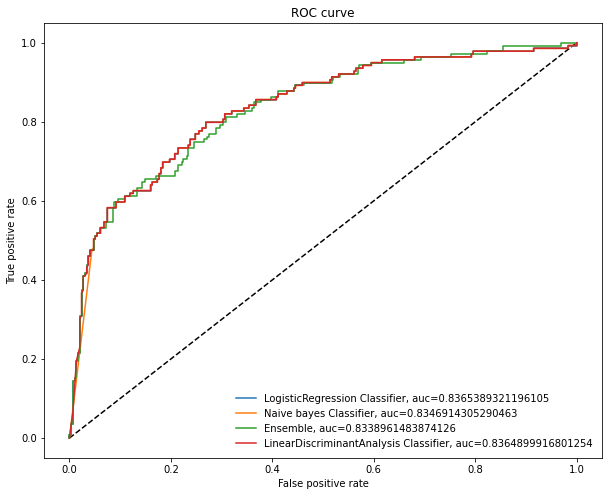

In [57]:
from sklearn import metrics
from sklearn.metrics import roc_curve


clf2=LogisticRegression().fit(feat_train,np.argmax(y_train,axis=1))
y_pred2 = clf2.predict(feat_test)

clf3 = GaussianNB().fit(feat_train,np.argmax(y_train,axis=1))
y_pred3 = clf3.predict(feat_test)

clf4 = ensemble.fit(feat_train,np.argmax(y_train,axis=1))
y_pred4 = clf4.predict(feat_test)

clf6=LinearDiscriminantAnalysis().fit(feat_train,np.argmax(y_train,axis=1))
y_pred6 = clf6.predict(feat_test)

#clf7=SVC(kernel='rbf').fit(feat_train,np.argmax(y_train,axis=1))
#y_pred7 = clf7.predict(feat_test)

y_pred_proba2 = clf2.predict_proba(feat_test)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba2)
auc2 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba2)

y_pred_proba3 = clf3.predict_proba(feat_test)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba3)
auc3 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba3)

y_pred_proba4 = clf4.predict_proba(feat_test)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba4)
auc4 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba4)

y_pred_proba6 = clf6.predict_proba(feat_test)[::,1]
fpr6, tpr6, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba6)
auc6 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba6)

#y_pred_proba7 = clf7.predict_proba(feat_test)[::,1]
#fpr7, tpr7, _ = metrics.roc_curve(np.argmax(y_test,axis =1),  y_pred_proba7)
#auc7 = metrics.roc_auc_score(np.argmax(y_test,axis =1), y_pred_proba7)


plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2,tpr2,label="LogisticRegression Classifier, auc="+str(auc2))
plt.plot(fpr3,tpr3,label="Naive bayes Classifier, auc="+str(auc3))
plt.plot(fpr4,tpr4,label="Ensemble, auc="+str(auc4))
plt.plot(fpr6,tpr6,label="LinearDiscriminantAnalysis Classifier, auc="+str(auc6))
#plt.plot(fpr7,tpr7,label="SVC Classifier, auc="+str(auc7))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(frameon=False)
plt.show()